In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso,LinearRegression
from sklearn.metrics import mean_squared_log_error,mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

In [117]:
train=pd.read_csv(r'D:\Downloads\train_yhhx1Xs\train.csv')
sample=pd.read_csv(r'D:\Downloads\sample_submission_pn2DrMq.csv')
test=pd.read_csv(r'D:\Downloads\test_QkPvNLx.csv')

# Eda

In [65]:
train.sort_values('Day_No',inplace=True)

# feature engineering

In [66]:
train['promotion']=0
train.loc[train.Day_No==6,'Short_Promotion']=12
j=0
for i in list(range(7,883)):
    if train.loc[train.Day_No==i,'Short_Promotion'].values[0]==1 and train.loc[train.Day_No==i-1,'promotion'].values[0]>5:
        j=1
    else:
        j+=1
    train.loc[train.Day_No==i,'promotion']=j  
             

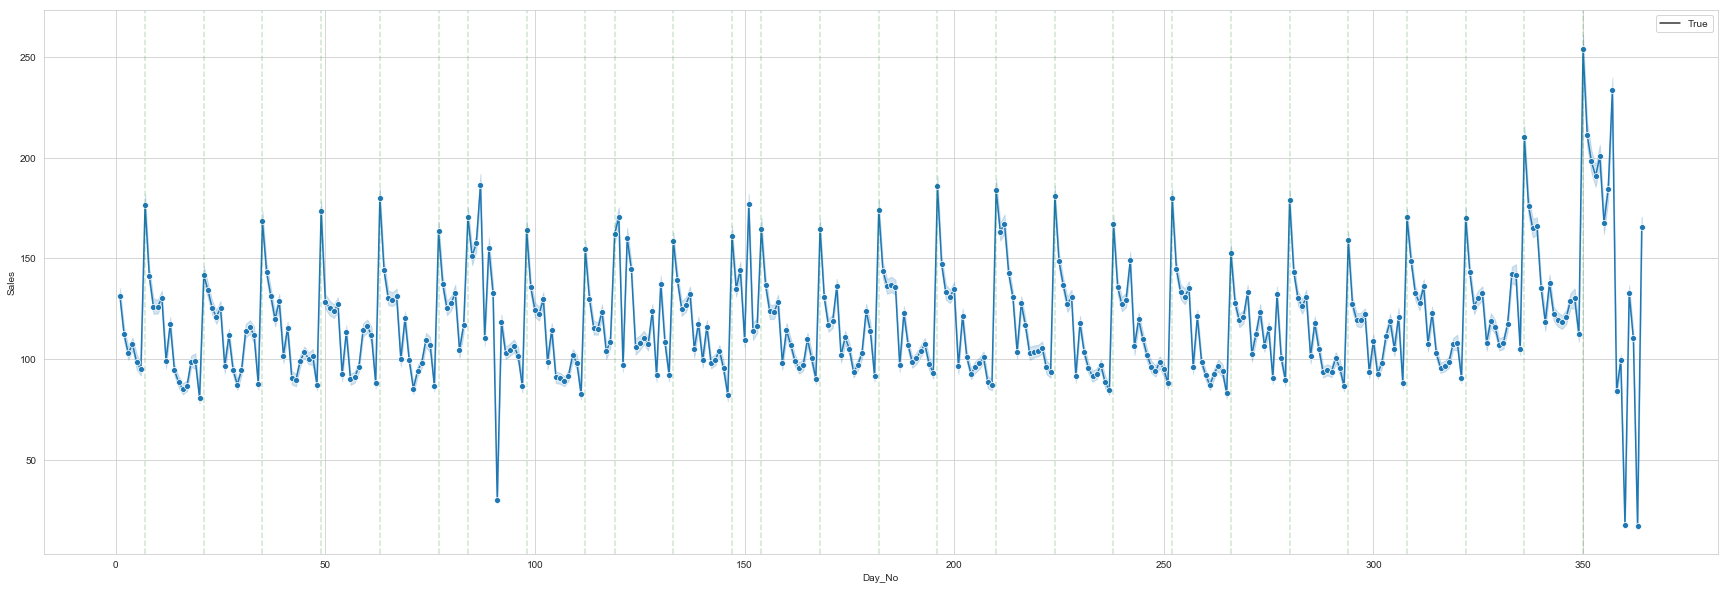

In [7]:
sns.set_style('whitegrid')
plt.figure(figsize=(30,10))
g=sns.lineplot(x='Day_No',y='Sales',data=train.loc[train.Day_No<365],style=True,marker='o')  

for i in set(train.loc[(train.promotion==1)&(train.Day_No<365),'Day_No']):
    g.axvline(x=i,color='g',linestyle='--',alpha=.2)  

one=len(train.loc[train.Day_No<=365])
three=len(train.loc[train.Day_No>=731])
two=512087-one-three
year1=np.ones((1,one)).flatten()
year2=np.ones((1,two)).flatten()*2
year3=np.ones((1,three)).flatten()*3
year=np.concatenate((year1,year2,year3))
train.Day_No.replace(np.arange(366,731),np.arange(1,366),inplace=True)
train.Day_No.replace(np.arange(731,883),np.arange(1,153),inplace=True)
train['year']=year


sns.set_style('whitegrid')
plt.figure(figsize=(30,10))
g=sns.lineplot(x='Day_No',y='Sales',data=train.loc[(train.year==3)&(train.Day_No<153),:],color='b',style=True,marker='o')
#g=sns.lineplot(x='Day_No',y='Sales',data=train.loc[(train.year==1)&(train.Day_No<153),:],color='g',style=True,marker='o')
week=np.ones((1,13)).flatten()*14
week[0]=-7
week=week.cumsum()

for i in week:
    g.axvline(x=i,color='y',linestyle='--')

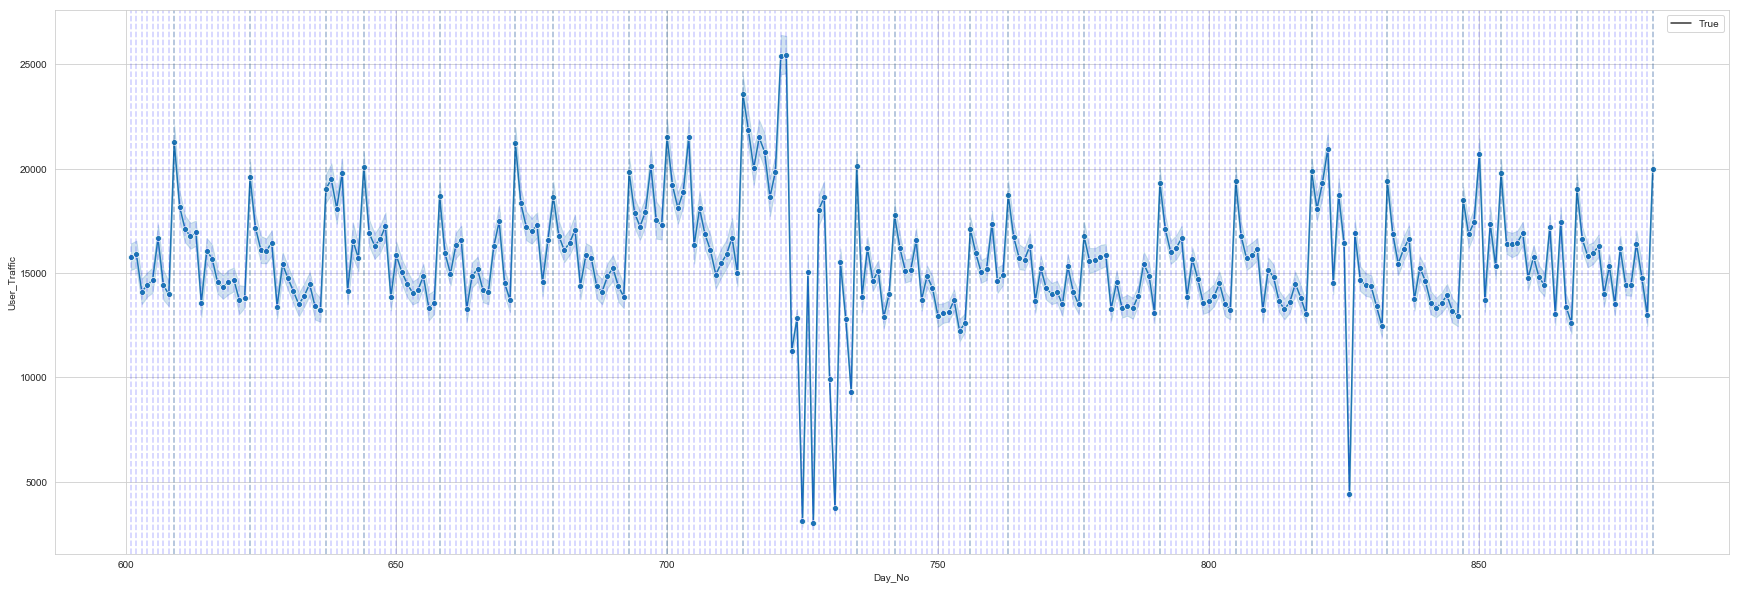

In [8]:
sns.set_style('whitegrid')
plt.figure(figsize=(30,10))
g=sns.lineplot(x='Day_No',y='User_Traffic',data=train.loc[train.Day_No>600],style=True,marker='o')  
for i in set(train.loc[(train.promotion==1)&(train.Day_No>600),'Day_No']):
    g.axvline(x=i,color='g',linestyle='--',alpha=.2)
for i in set(train.loc[(train.Long_Promotion==1)&(train.Day_No>600),'Day_No']):
    g.axvline(x=i,color='b',linestyle='--',alpha=.2)      

sns.set_style('whitegrid')
plt.figure(figsize=(30,5))
g=sns.lineplot(x='Day_No',y='Sales',data=train.loc[train.year==2],style=True,marker='o')  
for i in set(train.loc[(train.Short_Promotion==1)&(train.year==2),'Day_No']):
    g.axvline(x=i,color='g',linestyle='--',alpha=.2) 

In [ ]:
train.head()

sns.set_style('whitegrid')
plt.figure(figsize=(30,10))
g=sns.lineplot(x='Day_No',y='Sales',data=train.loc[train.year==1,:],color='b')
g=sns.lineplot(x='Day_No',y='Sales',data=train.loc[train.year==2,:],color='g')
g=sns.lineplot(x='Day_No',y='Sales',data=train.loc[train.year==3,:],color='r')
week=np.ones((1,30)).flatten()*14
week[0]=-7
week=week.cumsum()

for i in week:
    g.axvline(x=i,color='y',linestyle='--')

train['promotion']=0
train.set_index('Day_No',inplace=True)
for i in [0,1,2,3,4]:
    start=list(set(train.loc[(train.Short_Promotion==1)].index))[i::5]
    train.loc[start,'promotion']=i+1
train.reset_index(level='Day_No',inplace=True) 
train.promotion=train.promotion.astype('str')

In [ ]:
train.tail()

# model training and validation

In [15]:
#train.promotion=train.promotion.astype('str')

In [93]:
train.dropna(inplace=True)
sample=train.drop('User_Traffic',axis=1).sample(frac=1)
label=sample.pop('Sales')
mask=(sample.Day_No<600)
sample=pd.get_dummies(sample,drop_first=True)
X_train,X_test,y_train,y_test=sample.loc[mask],sample.loc[~mask],label[mask],label[~mask]
test_day=X_test.Day_No
X_train.drop(['Day_No','ID'],axis=1,inplace=True)
X_test.drop(['Day_No','ID'],axis=1,inplace=True)


C:\Users\pankaj\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [26]:
X_test.head()

,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric,Course_Domain_Development,Course_Domain_Finance & Accounting,Course_Domain_Software Marketing,Course_Type_Degree,Course_Type_Program,promotion_1,...,promotion_2,promotion_20,promotion_21,promotion_3,promotion_4,promotion_5,promotion_6,promotion_7,promotion_8,promotion_9
86789,0,0,0,0.022,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
95085,1,0,0,0.007,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
448651,0,0,1,0.030,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
345173,1,0,1,0.159,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
422918,0,0,0,0.217,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
X_train.shape,X_test.shape

((353272, 31), (157051, 31))

In [51]:
gb=GradientBoostingRegressor(learning_rate=.5,n_estimators=300).fit(X_train,y_train)
y_pred=gb.predict(X_test)

In [52]:
y_pred[y_pred<0]=-y_pred[y_pred<0]

In [104]:
rf=RandomForestRegressor(n_estimators=100,n_jobs=-1).fit(X_train,y_train)
y_pred=rf.predict(X_test)

ls=Lasso(alpha=.01).fit(X_train,y_train)
y_pred=ls.predict(X_test)

In [105]:
mean_squared_log_error(y_test,y_pred)

0.06098029451308751

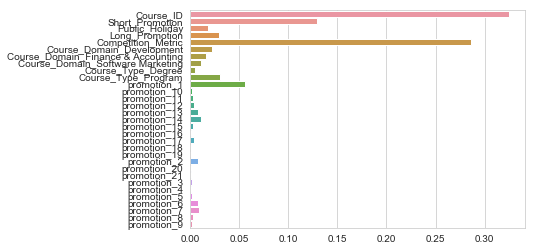

In [33]:
sns.barplot(y=X_train.columns,x=rf.feature_importances_)

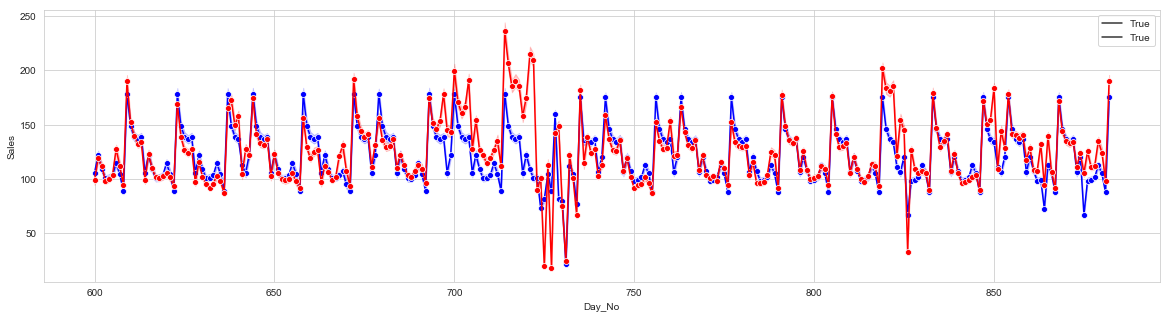

In [106]:
plt.figure(figsize=(20,5))
sns.lineplot(x=test_day,y=y_pred,color='b',style=True,marker='o')
sns.lineplot(x='Day_No',y='Sales',data=train.loc[train.Day_No>=600],color='r',style=True,marker='o')

# training a final model

In [107]:
train.dropna(inplace=True)
feature=train.drop('User_Traffic',axis=1)

label=feature.pop('Sales')
feature.drop(['Day_No','ID'],axis=1,inplace=True)
feature=pd.get_dummies(feature,drop_first=True)

In [1225]:
gb=GradientBoostingRegressor(learning_rate=.5,n_estimators=300).fit(feature,label)

In [108]:
rf=RandomForestRegressor(n_estimators=100,n_jobs=-1).fit(feature,label)

# prediction on test data

In [1352]:
test.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric,promotion
0,883,883,1,Development,Course,1,0,1,0.007,1
1,884,884,1,Development,Course,1,0,1,0.007,2
2,885,885,1,Development,Course,1,0,1,0.007,3
3,886,886,1,Development,Course,1,0,1,0.007,4
4,887,887,1,Development,Course,0,0,1,0.007,5


In [1353]:
test.Day_No.max()

942

In [118]:
test['promotion']=0
j=0
for i in list(range(883,943)):
    try:
        if test.loc[test.Day_No==i,'Short_Promotion'].values[0]==1 and test.loc[test.Day_No==i-1,'promotion'].values[0]>5:
            j=1
        else:
            j+=1
    except:
        j=1
    test.loc[test.Day_No==i,'promotion']=j  

In [119]:
test.isnull().sum()

ID                      0
Day_No                  0
Course_ID               0
Course_Domain           0
Course_Type             0
Short_Promotion         0
Public_Holiday          0
Long_Promotion          0
Competition_Metric    120
promotion               0
dtype: int64

In [120]:
test.Competition_Metric.fillna(.007,inplace=True)

In [113]:
test.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric,promotion
0,883,883,1,Development,Course,1,0,1,0.007,1
1,884,884,1,Development,Course,1,0,1,0.007,2
2,885,885,1,Development,Course,1,0,1,0.007,3
3,886,886,1,Development,Course,1,0,1,0.007,4
4,887,887,1,Development,Course,0,0,1,0.007,5


In [121]:
ID=test.ID

In [122]:
test.drop(['Day_No','ID',],axis=1,inplace=True)
test=pd.get_dummies(test,drop_first=True)

In [123]:
X_train.shape,test.shape

((353272, 11), (36000, 11))

In [124]:
submit=np.round((rf.predict(test)))

In [125]:
submit=pd.DataFrame({'ID':ID,'Sales':submit})


In [126]:
submit.Sales=submit.Sales.astype('int')

In [127]:
submit.to_csv(r'C:\Users\pankaj\Desktop\women.csv',index=False)

In [128]:
t=pd.read_csv(r'D:\Downloads\test_QkPvNLx.csv')
day=t.Day_No
submit['day']=day

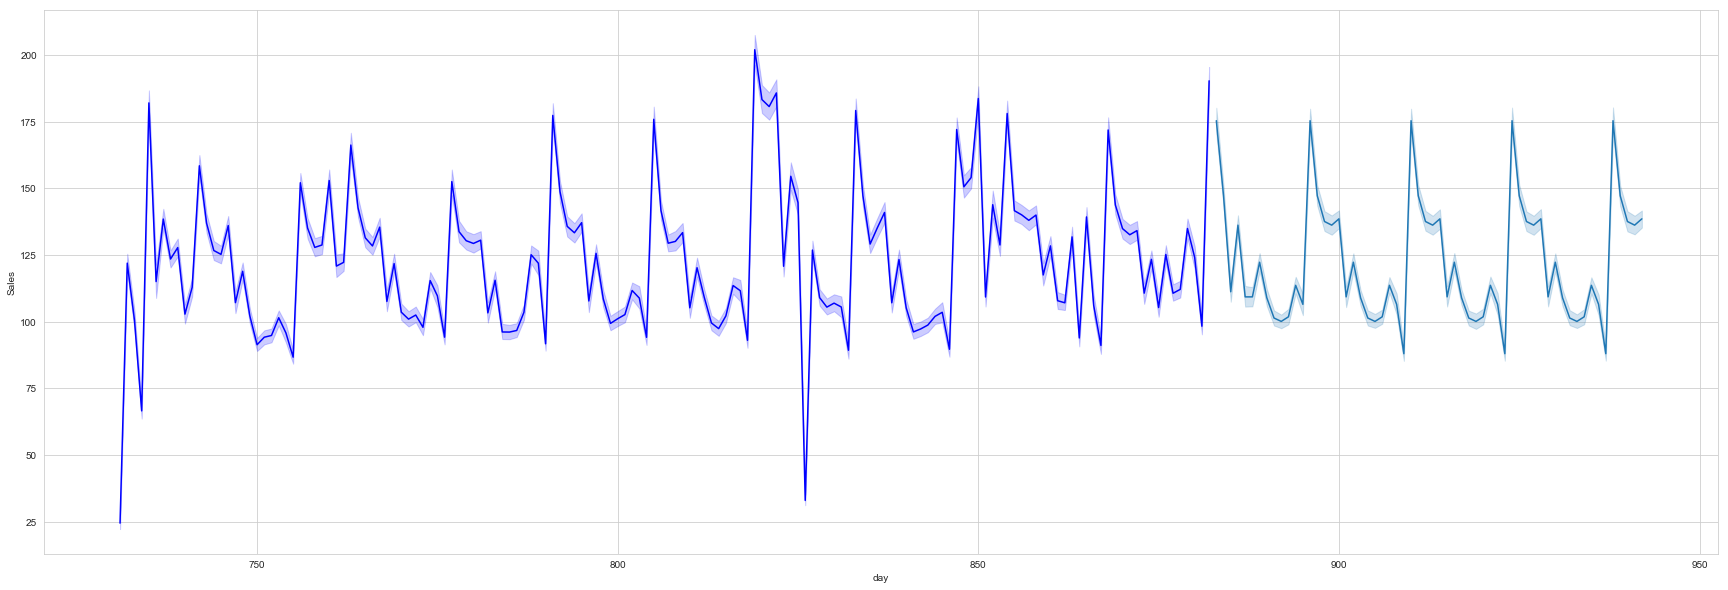

In [129]:
sns.set_style('whitegrid')
plt.figure(figsize=(30,10))
g=sns.lineplot(x='Day_No',y='Sales',data=train.loc[train.Day_No>730,:],color='b')
sns.lineplot(x='day',y='Sales',data=submit)

In [829]:
sample.head()

,ID,Sales
0,883,5
1,884,5
2,885,5
3,886,5
4,887,5


In [743]:
submit.head()

,ID,Sales
0,883,41
1,884,34
2,885,34
3,886,34
4,887,17


In [ ]:
train.y